<a href="https://colab.research.google.com/github/Atadewa/AchieveIT/blob/main/Week03_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum D1 - Operasi Citra Sederhana

## 1. Inverse Citra


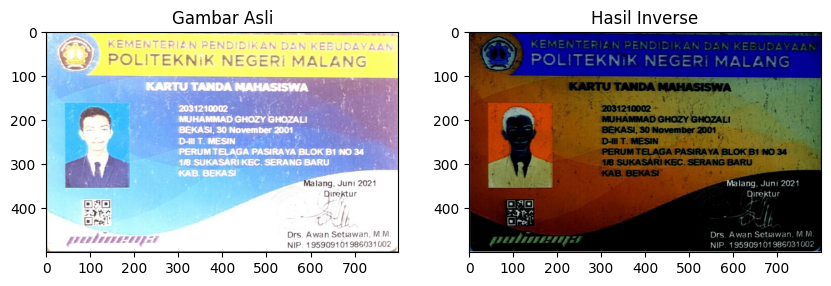

In [138]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

ktm = cv2.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-03/img/KTM_lama.jpg')
ktm_inverse = 255 - ktm

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ktm, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(ktm_inverse, cv2.COLOR_BGR2RGB))
plt.title('Hasil Inverse')

plt.show()

## 2. Transformasi Contrast

Mengubah Kontras & tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 sampai 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


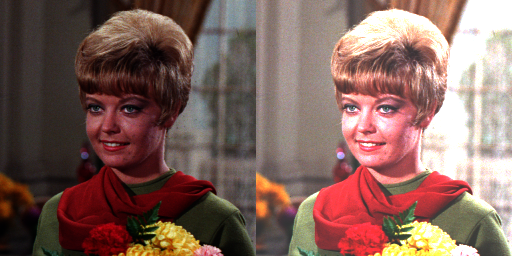

In [139]:
import numpy as np

print('Mengubah Kontras & tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 sampai 255]: '))
  alpha = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError :
  print('Error, not a number')

img = cv2.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-03/img/female.tiff')
img_hasil = np.zeros(img.shape, img.dtype)

# Mengakses per pixel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      img_hasil[y, x, c] = np.clip(alpha * img[y, x, c] + brightness, 0, 255)

final_frame = cv2.hconcat((img, img_hasil))
cv2_imshow(final_frame)

## 3. Transformasi Logarithmic Brightness

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------
Masukkan nilai kecerahan : 50


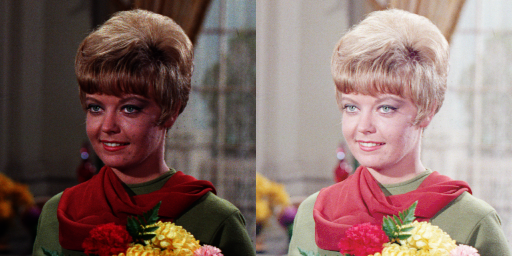

In [140]:

print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError :
  print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-03/img/female.tiff')

# Menentukan konstanta c
c = 255 / np.log(1 + np.max(original))
log_img = np.zeros(original.shape, original.dtype)

# Mengakses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for channel in range(original.shape[2]):
            log_img[y, x, channel] = np.clip(c * np.log(1 + original[y, x, channel]), 0, 255)

final_frame = cv2.hconcat((original, log_img.astype(np.uint8)))
cv2_imshow(final_frame)

## 4. Transformasi Grayscale

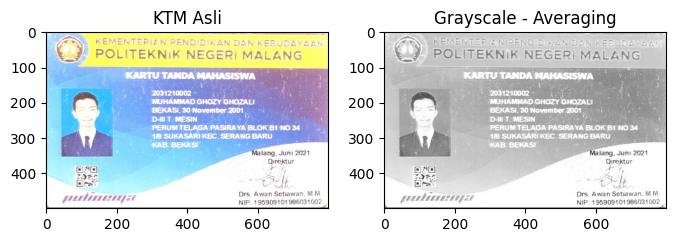

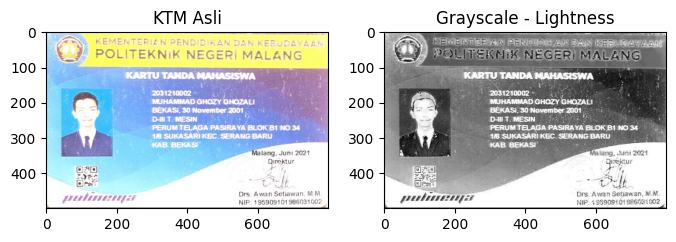

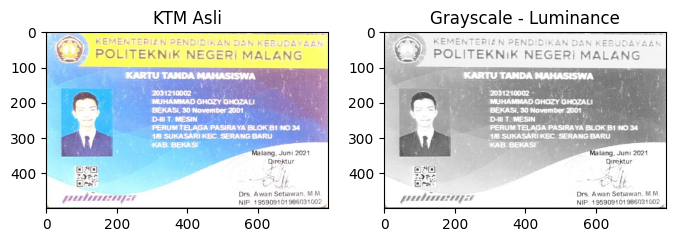

In [141]:
img = cv2.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-03/img/KTM_lama.jpg')
img_hasil = np.zeros(img.shape, img.dtype)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 1. Gray Averaging

gray_avg = np.mean(img_rgb, axis=2).astype(np.uint8)

plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("KTM Asli")

plt.subplot(1,2,2)
plt.imshow(gray_avg, cmap="gray")
plt.title("Grayscale - Averaging")
plt.show()

# 2. Grayscale Lightness
gray_light = ((np.max(img_rgb, axis=2) + np.min(img_rgb, axis=2)) / 2).astype(np.uint8)

plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("KTM Asli")

plt.subplot(1,2,2)
plt.imshow(gray_light, cmap="gray")
plt.title("Grayscale - Lightness")
plt.show()

# 3. Grayscale Luminance
gray_lumi = (0.21 * img_rgb[:,:,0] + 0.72 * img_rgb[:,:,1] + 0.07 * img_rgb[:,:,2]).astype(np.uint8)

plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("KTM Asli")

plt.subplot(1,2,2)
plt.imshow(gray_lumi, cmap="gray")
plt.title("Grayscale - Luminance")
plt.show()

## 5. Grayscale

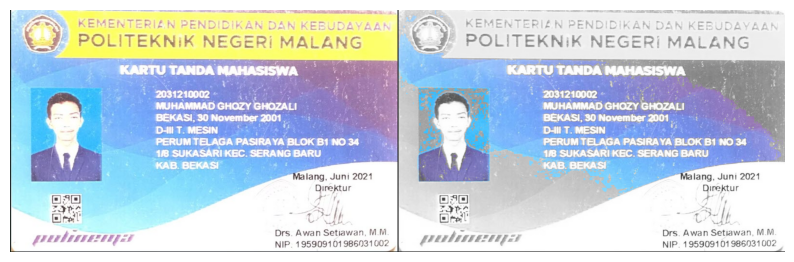

In [142]:
img = cv2.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-03/img/KTM_lama.jpg')

# Konversi ke HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Range warna biru
lower_blue = np.array([100, 80, 50])
upper_blue = np.array([140, 255, 255])

# Membuat mask biru
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_not_blue = cv2.bitwise_not(mask_blue)

# Grayscale dan konversi ke BGR
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

# Menggabungkan bagian berwarna dan abu-abu
color_part = cv2.bitwise_and(img, img, mask=mask_blue)
gray_part = cv2.bitwise_and(gray_bgr, gray_bgr, mask=mask_not_blue)
hasil = cv2.add(color_part, gray_part)

# Gabungkan gambar asli dan hasil secara horizontal
img_perbandingan = cv2.hconcat([img, hasil])

img_perbandingan_rgb = cv2.cvtColor(img_perbandingan, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(img_perbandingan_rgb)
plt.axis('off')
plt.show()


# Tugas Praktikum D2 - Operasi Aritmatika dan Logika

## 1. Membuat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


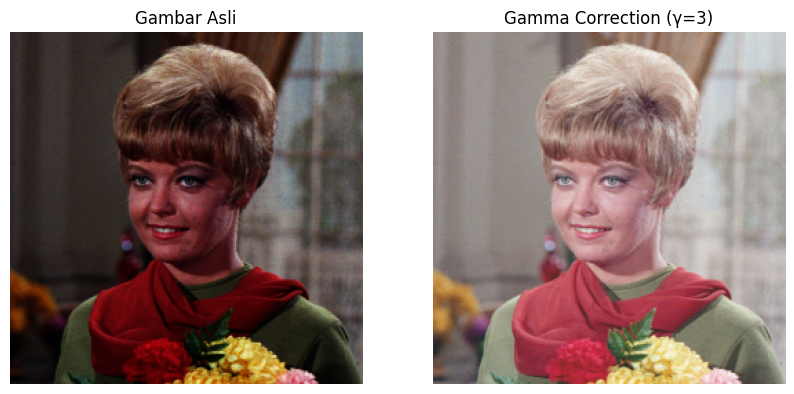

In [143]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')


img = cv2.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-03/img/female.tiff')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Normalisasi pixel ke [0,1]
normalized = img_rgb / 255.0

# Rumus gamma correction: s = c * r^γ
gamma_corrected = np.power(normalized, 1.0/gamma)

# Kembalikan ke skala [0,255]
gamma_img = np.uint8(gamma_corrected * 255)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Gambar Asli')

plt.subplot(1,2,2)
plt.imshow(gamma_img)
plt.axis('off')
plt.title(f'Gamma Correction (γ={gamma})')

plt.show()

## 2. Membuat Simulasi Image Depth

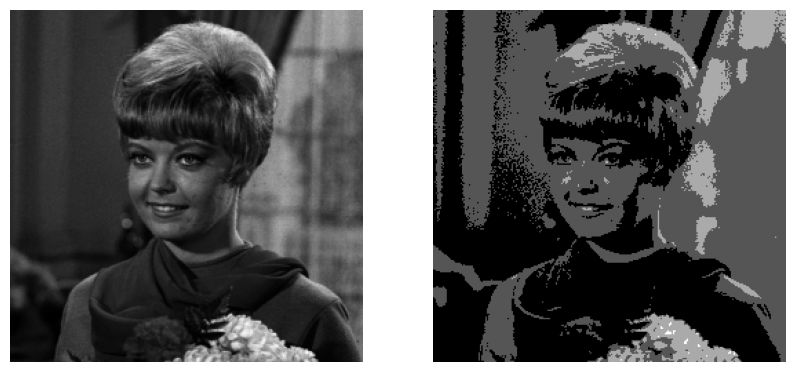

In [144]:
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Baca citra grayscale
original = cv2.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-03/img/female.tiff', cv2.IMREAD_GRAYSCALE)

# Buat array kosong dengan ukuran sama
depth_image = np.zeros(original.shape, dtype=np.uint8)

# Terapkan kuantisasi bit-depth
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = round(original[i, j] / level) * level

# Tampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(original, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(depth_image, cmap='gray')
plt.axis('off')

plt.show()

## 3. Membuat Modul Average Denoising

Jumlah gambar terbaca: 100


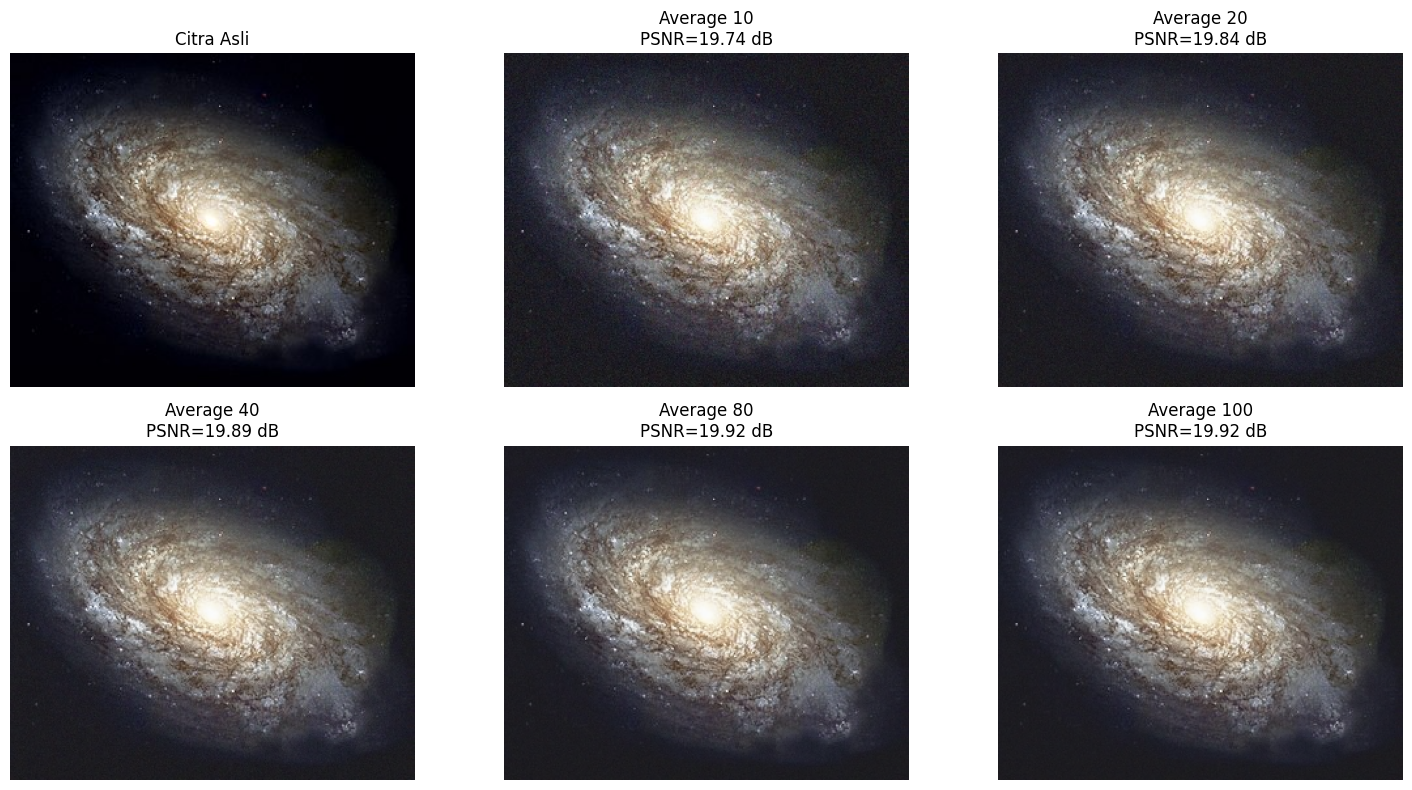

Jumlah citra di-average: 10, PSNR = 19.74 dB
Jumlah citra di-average: 20, PSNR = 19.84 dB
Jumlah citra di-average: 40, PSNR = 19.89 dB
Jumlah citra di-average: 80, PSNR = 19.92 dB
Jumlah citra di-average: 100, PSNR = 19.92 dB


In [145]:
import glob

# === 1. Fungsi PSNR ===
def PSNR(img1, img2):
    mse = np.mean((img1.astype(np.float32) - img2.astype(np.float32)) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# === 2. Baca citra asli ===
original = cv2.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-03/img/galaxy.jpg')

# === 3. Baca semua citra dengan noise (urutkan!) ===
noisy_imgs = []
files = glob.glob('/content/drive/MyDrive/PCVK25_3G_01/Week-03/img/noises/*.jpg')
files.sort()  # penting! agar Salinan 1..100 berurutan

for img in files:
    n = cv2.imread(img)
    noisy_imgs.append(n)

print("Jumlah gambar terbaca:", len(noisy_imgs))  # harusnya 100

# === 4. Average Denoising untuk 10,20,40,80,100 citra ===
avg_results = []
psnr_values = []
jumlah_citra = [10, 20, 40, 80, 100]

for jml in jumlah_citra:
    avg_img = np.zeros_like(noisy_imgs[0], dtype=np.float32)
    for i in range(jml):
        avg_img += noisy_imgs[i].astype(np.float32)
    avg_img /= jml
    avg_img = np.uint8(avg_img)

    psnr_value = PSNR(avg_img, original)
    avg_results.append(avg_img)
    psnr_values.append(psnr_value)

# === 5. Tampilkan hasil dalam 2x3 grid ===
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(cv2.cvtColor(avg_results[0], cv2.COLOR_BGR2RGB))
plt.title(f"Average 10\nPSNR={psnr_values[0]:.2f} dB")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(cv2.cvtColor(avg_results[1], cv2.COLOR_BGR2RGB))
plt.title(f"Average 20\nPSNR={psnr_values[1]:.2f} dB")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(cv2.cvtColor(avg_results[2], cv2.COLOR_BGR2RGB))
plt.title(f"Average 40\nPSNR={psnr_values[2]:.2f} dB")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(cv2.cvtColor(avg_results[3], cv2.COLOR_BGR2RGB))
plt.title(f"Average 80\nPSNR={psnr_values[3]:.2f} dB")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(cv2.cvtColor(avg_results[4], cv2.COLOR_BGR2RGB))
plt.title(f"Average 100\nPSNR={psnr_values[4]:.2f} dB")
plt.axis("off")

plt.tight_layout()
plt.show()

for jml, psnr_val in zip(jumlah_citra, psnr_values):
    print(f"Jumlah citra di-average: {jml}, PSNR = {psnr_val:.2f} dB")


**Kesimpulan:**

Dari hasil PSNR yang saya catat pada tabel diatas, kesimpulan yang dapat diambil adalah semakin banyak jumlah citra yang dirata-ratakan, maka nilai PSNR yang dihasilkan cenderung meningkat, meskipun kenaikannya relatif kecil (hanya sekitar 0.18 dB dari 10 citra hingga 100 citra). Hal ini menunjukkan bahwa proses averaging memang mampu mereduksi noise dan membuat citra hasil lebih mendekati citra asli, namun efektivitas peningkatan kualitas mulai melambat ketika jumlah citra yang di-average semakin banyak.

## 4. Image Masking

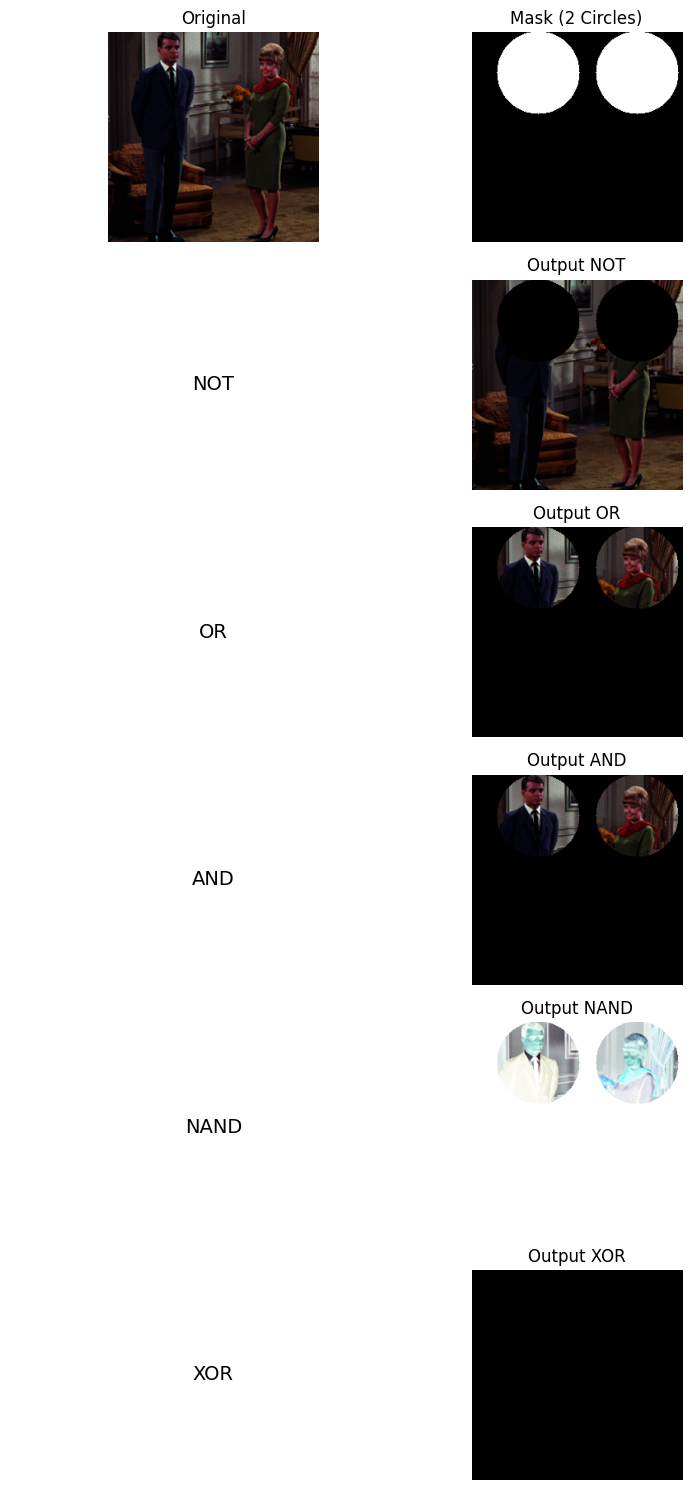

In [146]:
img = cv2.imread('/content/drive/MyDrive/PCVK25_3G_01/Week-03/img/couple.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Membuat mask lingkaran
mask = np.zeros(img_gray.shape, dtype="uint8")
cv2.circle(mask, (80, 50), 50, 255, -1)
cv2.circle(mask, (200, 50), 50, 255, -1)

# Operasi logika
not_mask = cv2.bitwise_not(mask)
or_img   = cv2.bitwise_or(img, img, mask=mask)
and_img  = cv2.bitwise_and(img, img, mask=mask)
nand_img = cv2.bitwise_not(and_img)
xor_img  = cv2.bitwise_xor(img, img, mask=mask)

plt.figure(figsize=(8,15))

# Baris 1
plt.subplot(6,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(6,2,2)
plt.imshow(mask, cmap='gray')
plt.title("Mask (2 Circles)")
plt.axis("off")

# Baris 2: NOT
plt.subplot(6,2,3)
plt.text(0.5, 0.5, "NOT", fontsize=14, ha='center', va='center')
plt.axis("off")

plt.subplot(6,2,4)
plt.imshow(cv2.cvtColor(cv2.bitwise_and(img,img,mask=not_mask), cv2.COLOR_BGR2RGB))
plt.title("Output NOT")
plt.axis("off")

# Baris 3: OR
plt.subplot(6,2,5)
plt.text(0.5, 0.5, "OR", fontsize=14, ha='center', va='center')
plt.axis("off")

plt.subplot(6,2,6)
plt.imshow(cv2.cvtColor(or_img, cv2.COLOR_BGR2RGB))
plt.title("Output OR")
plt.axis("off")

# Baris 4: AND
plt.subplot(6,2,7)
plt.text(0.5, 0.5, "AND", fontsize=14, ha='center', va='center')
plt.axis("off")

plt.subplot(6,2,8)
plt.imshow(cv2.cvtColor(and_img, cv2.COLOR_BGR2RGB))
plt.title("Output AND")
plt.axis("off")

# Baris 5: NAND
plt.subplot(6,2,9)
plt.text(0.5, 0.5, "NAND", fontsize=14, ha='center', va='center')
plt.axis("off")

plt.subplot(6,2,10)
plt.imshow(cv2.cvtColor(nand_img, cv2.COLOR_BGR2RGB))
plt.title("Output NAND")
plt.axis("off")

# Baris 6: XOR
plt.subplot(6,2,11)
plt.text(0.5, 0.5, "XOR", fontsize=14, ha='center', va='center')
plt.axis("off")

plt.subplot(6,2,12)
plt.imshow(cv2.cvtColor(xor_img, cv2.COLOR_BGR2RGB))
plt.title("Output XOR")
plt.axis("off")

plt.tight_layout()
plt.show()


**Analisa Hasil**

Dari hasil percobaan operasi logika pada citra dengan mask dua lingkaran:
1. `NOT` menghasilkan kebalikan mask, sehingga area lingkaran jadi hitam dan background jadi putih.
2. `OR` menampilkan bagian citra pada area mask saja.
3. `AND` juga menampilkan bagian citra dalam area mask, sehingga hasilnya mirip dengan `OR`.
4. `NAND` menghasilkan kebalikan dari `AND`, sehingga area lingkaran menjadi invers (berwarna terbalik) sementara bagian lain putih.
5. `XOR` menghasilkan citra hitam karena operasi dilakukan antara citra dengan dirinya sendiri pada area mask, sehingga nilainya selalu 0.